In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [2]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


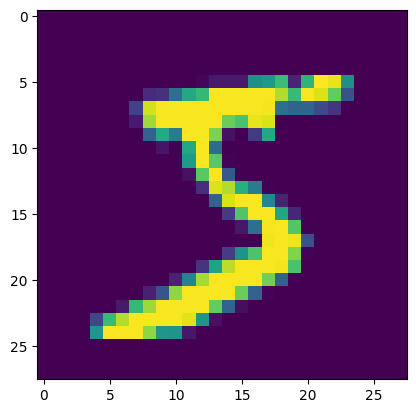

In [4]:
plt.imshow(X_train[0])
print(y_train[0])

# Simple Model

In [5]:
INPUT_SHAPE = (28,28)

model = Sequential([
    Flatten(input_shape = INPUT_SHAPE),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, batch_size=16, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8332 - loss: 3.9789 - val_accuracy: 0.9317 - val_loss: 0.2486
Epoch 2/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9291 - loss: 0.2597 - val_accuracy: 0.9391 - val_loss: 0.2261
Epoch 3/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9452 - loss: 0.2104 - val_accuracy: 0.9497 - val_loss: 0.2075
Epoch 4/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9564 - loss: 0.1686 - val_accuracy: 0.9543 - val_loss: 0.2156
Epoch 5/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9632 - loss: 0.1442 - val_accuracy: 0.9667 - val_loss: 0.1412
Epoch 6/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9682 - loss: 0.1337 - val_accuracy: 0.9612 - val_loss: 0.1747
Epoch 7/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9703 - loss: 0.1225 - val_accuracy: 0.9629 - val_loss: 0.2081
Epoch 8/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9727 - loss:

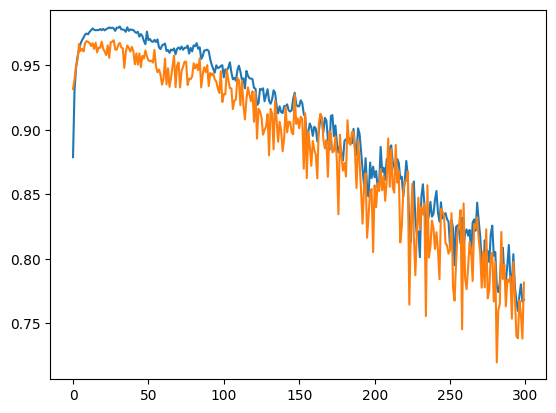

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

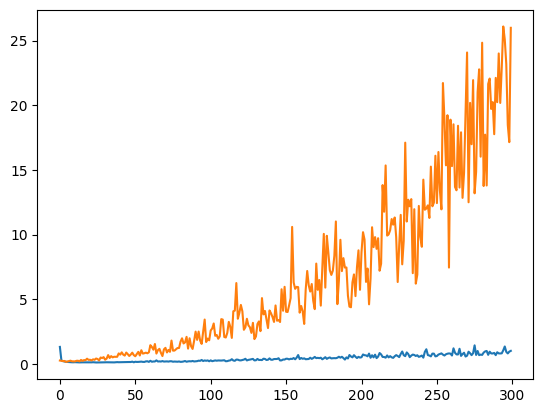

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [13]:
model.save('model.h5')

# L2 Regularization

In [10]:
l2_model = Sequential([
    Flatten(input_shape = INPUT_SHAPE),
    Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(units=10, activation='softmax')
])

In [11]:
l2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
l2_history = l2_model.fit(X_train, y_train, batch_size=16, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8415 - loss: 21.7558 - val_accuracy: 0.9138 - val_loss: 0.6612
Epoch 2/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9077 - loss: 0.6397 - val_accuracy: 0.9068 - val_loss: 0.5671
Epoch 3/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9045 - loss: 0.5805 - val_accuracy: 0.9137 - val_loss: 0.5176
Epoch 4/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9073 - loss: 0.5578 - val_accuracy: 0.9063 - val_loss: 0.5241
Epoch 5/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9038 - loss: 0.5546 - val_accuracy: 0.9089 - val_loss: 0.5970
Epoch 6/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9073 - loss: 0.5434 - val_accuracy: 0.9240 - val_loss: 0.4617
Epoch 7/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9041 - loss: 0.5348 - val_accuracy: 0.9145 - val_loss: 0.5190
Epoch 8/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9087 - l

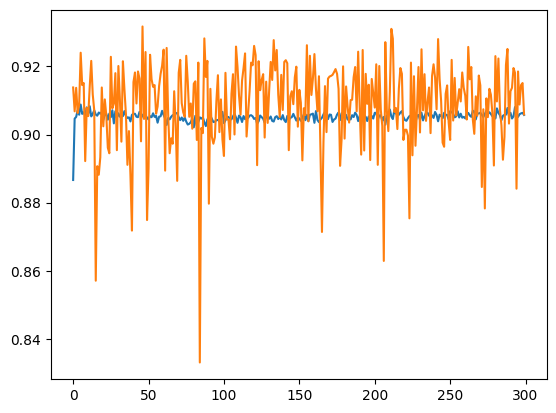

In [28]:
plt.plot(l2_history.history['accuracy'])
plt.plot(l2_history.history['val_accuracy'])

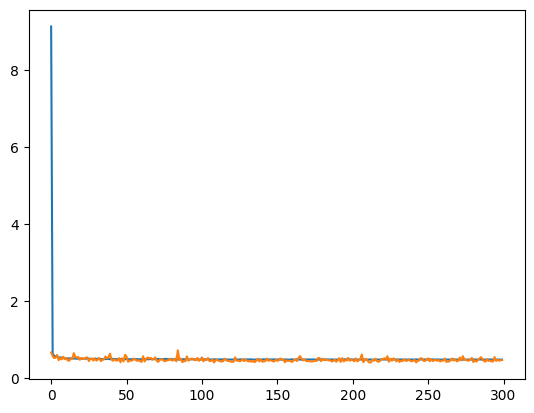

In [29]:
plt.plot(l2_history.history['loss'])
plt.plot(l2_history.history['val_loss'])

In [14]:
l2_model.save('l2_model.h5')

# Early Stopping

In [21]:
drop_model = Sequential([
    Flatten(input_shape=INPUT_SHAPE),
    Dense(units=256, activation='relu'),
    Dropout(0.3),
    Dense(units=128, activation='relu'),
    Dropout(0.3),
    Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
drop_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
es_callback = EarlyStopping(patience=10)

In [24]:
drop_history = drop_model.fit(X_train, y_train, batch_size=16, epochs=300, validation_data=(X_test, y_test), callbacks=[es_callback])

Epoch 1/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6773 - loss: 7.7000 - val_accuracy: 0.9024 - val_loss: 0.3516
Epoch 2/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8456 - loss: 0.5737 - val_accuracy: 0.9200 - val_loss: 0.2845
Epoch 3/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8759 - loss: 0.4754 - val_accuracy: 0.9393 - val_loss: 0.2490
Epoch 4/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8875 - loss: 0.4345 - val_accuracy: 0.9510 - val_loss: 0.2173
Epoch 5/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9009 - loss: 0.3902 - val_accuracy: 0.9429 - val_loss: 0.2378
Epoch 6/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9037 - loss: 0.3851 - val_accuracy: 0.9478 - val_loss: 0.2301
Epoch 7/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9089 - loss: 0.3715 - val_accuracy: 0.9551 - val_loss: 0.2016
Epoch 8/300
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9134 - loss

In [25]:
drop_model.save('drop_model.h5')

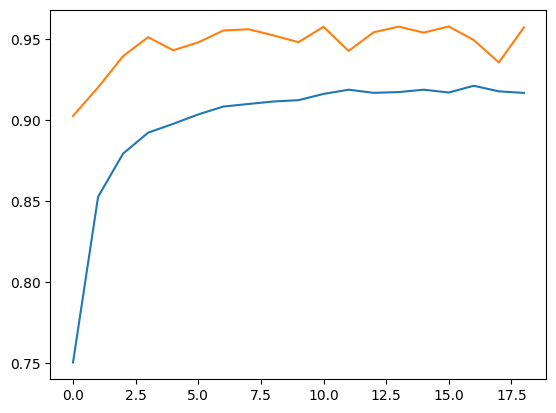

In [30]:
plt.plot(drop_history.history['accuracy'])
plt.plot(drop_history.history['val_accuracy'])

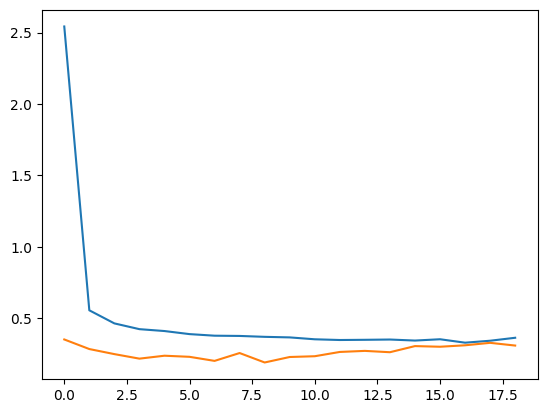

In [31]:
plt.plot(drop_history.history['loss'])
plt.plot(drop_history.history['val_loss'])